In [1]:
from qiskit import Aer, QuantumCircuit
from qiskit_finance.circuit.library import NormalDistribution
from qiskit.test.mock import FakeTokyo
from qiskit.compiler import transpile
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]


In [109]:
#qc = QuantumCircuit(8)
#qc.h(range(8))
qc = NormalDistribution(8, mu=0, sigma=0.1)
#backend = FakeTokyo()
#qc = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=0)
qc.measure_all()
for i in range(0,64):
    qc = qc.decompose()
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=100000, memory=True).result()
counts = result.get_counts()
memory = result.get_memory()

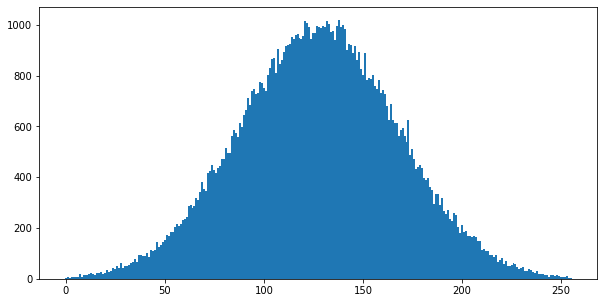

In [110]:
plt.bar([int(x, 2) for x in counts.keys()], counts.values(), width=1)
plt.show()

In [111]:
memory = [int(x, 2) for x in memory]
memory = np.clip(np.divide(memory, 255), 0.0001, 0.9999)

### metoda asta e numai pentru uniforma, vezi aici: https://www.eg.bucknell.edu/~xmeng/Course/CS6337/Note/master/node43.html
### Implementeaza cu totul formula aia de sus, nu face cu i/N acolo la maxim

-0.00010101109141330447
0.9998880380282494


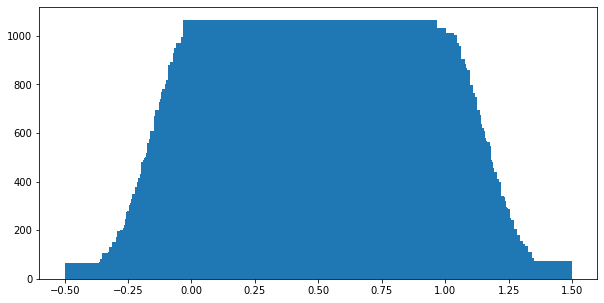

In [130]:
basis = np.random.normal(loc=np.mean(memory), scale=np.std(memory), size=100000)
basis_plot = np.round(basis * 255)
basis_plot = np.clip(np.divide(basis_plot, 255), 0.0001, 0.9999)
basis_plot_uniques = list(set(basis_plot))
basis_plot = {i: np.count_nonzero(basis_plot == i) for i in basis_plot_uniques}
plt.bar(basis_plot.keys(), basis_plot.values(), width=1)
D_plus = 0
D_minus = 0
N = len(memory)
memory_cdf = np.sort(memory)
basis_cdf = np.sort(basis)
#arange1 = np.arange(1.0, N + 1) / N
#arange2 = np.arange(0.0, N) / N
arange1 = basis_cdf / N
arange2 = basis_cdf / N
D_plus = (arange1 - memory_cdf).max()
D_minus = (memory_cdf - arange2).max()
print(D_plus)
print(D_minus)


In [119]:
test = stats.kstest(memory, 'norm', args=(0, 0.1))
test

KstestResult(statistic=0.9508551771645074, pvalue=0.0)

In [13]:
basis_uniform = np.random.uniform(0, 1, 100000)
D_plus = []
D_minus = []
N = len(memory)
memory = np.sort(memory)
arange1 = np.arange(1.0, N + 1) / N
arange2 = np.arange(0.0, N) / N
for i in range(1, N + 1):
    x = arange1 - memory[i-1]
    D_plus.append(x)

for i in range(1, N + 1):
    y = memory[i-1] -  arange2
    D_minus.append(y)
    
D_plus_max = max(D_plus)
D_minus_max = max(D_minus)
ans = max(D_plus_max, D_minus_max)
ans

MemoryError: Unable to allocate 781. KiB for an array with shape (100000,) and data type float64

In [16]:
test = stats.kstest(memory, 'uniform')
test

KstestResult(statistic=0.006055490196078428, pvalue=0.0013008652971341719)

In [3]:
countstemp = {int(x, 2): counts[x] for x in counts.keys()}

In [4]:
df1_data = {"number": [int(x, 2) for x in counts.keys()], "counts": [x for x in counts.values()]}
df1 = pd.DataFrame.from_dict(df1_data)

In [7]:
df1

,number,counts
0,100,369
1,184,372
2,169,385
3,0,372
4,154,399
...,...,...
251,29,358
252,246,399
253,136,407
254,178,401


In [5]:
kolomogorov_counts = df1['counts'].to_list()
kolomogorov_counts.sort()
kolomogorov_counts

[332,
 338,
 344,
 346,
 347,
 348,
 352,
 355,
 356,
 356,
 358,
 358,
 358,
 359,
 360,
 361,
 361,
 362,
 363,
 364,
 364,
 364,
 365,
 365,
 366,
 366,
 366,
 367,
 367,
 368,
 368,
 368,
 368,
 368,
 368,
 369,
 369,
 369,
 369,
 370,
 370,
 370,
 370,
 371,
 372,
 372,
 372,
 372,
 372,
 373,
 373,
 373,
 373,
 374,
 374,
 374,
 375,
 375,
 375,
 376,
 376,
 376,
 377,
 377,
 377,
 377,
 377,
 377,
 377,
 378,
 378,
 378,
 378,
 378,
 378,
 379,
 379,
 379,
 379,
 379,
 380,
 380,
 380,
 381,
 381,
 381,
 381,
 381,
 381,
 382,
 382,
 382,
 382,
 382,
 383,
 383,
 384,
 384,
 384,
 384,
 384,
 385,
 385,
 385,
 385,
 385,
 386,
 386,
 386,
 386,
 386,
 387,
 387,
 387,
 387,
 387,
 387,
 387,
 388,
 388,
 388,
 388,
 389,
 389,
 389,
 390,
 390,
 390,
 390,
 391,
 391,
 391,
 391,
 392,
 392,
 392,
 392,
 392,
 393,
 393,
 393,
 394,
 394,
 394,
 395,
 395,
 395,
 395,
 396,
 396,
 396,
 396,
 396,
 396,
 397,
 397,
 397,
 397,
 397,
 398,
 398,
 398,
 398,
 399,
 399,
 399,
 399

In [53]:
D_plus = []
D_minus = []
N = len(kolomogorov_counts)
for i in range(1, N + 1):
    x = i / N - kolomogorov_counts[i-1]
    D_plus.append(x)

for i in range(1, N + 1):
    y =(i-1)/N
    y =kolomogorov_counts[i-1]-y
    D_minus.append(y)
    
D_plus_max = max(D_plus)
D_minus_max = max(D_minus)
ans = max(D_plus_max, D_minus_max)
ans

454.0078125

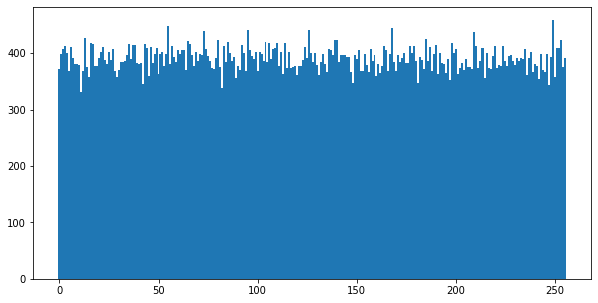

In [6]:
plt.bar([int(x, 2) for x in counts.keys()], counts.values(), width=1)
plt.show()

In [34]:
#x = stats.kstest(list(counts.values()), 'norm')
x = stats.kstest(stats.norm.rvs(size=len(counts.values()), random_state=list(counts.values())), stats.norm.cdf)

ValueError: [380, 382, 380, 392, 391, 380, 383, 373, 393, 350, 386, 380, 426, 387, 425, 370, 405, 368, 422, 384, 393, 393, 416, 403, 384, 425, 358, 409, 398, 424, 406, 404, 411, 374, 370, 397, 424, 435, 417, 385, 403, 391, 415, 369, 394, 379, 399, 395, 369, 379, 410, 398, 401, 392, 370, 390, 347, 409, 390, 377, 368, 375, 382, 371, 390, 398, 430, 376, 397, 426, 344, 383, 407, 417, 388, 408, 412, 366, 372, 421, 404, 432, 374, 369, 388, 360, 375, 370, 386, 418, 385, 378, 394, 375, 370, 436, 410, 403, 386, 377, 413, 391, 354, 379, 398, 385, 382, 367, 379, 394, 394, 367, 382, 410, 378, 392, 394, 379, 381, 402, 388, 395, 371, 455, 358, 361, 351, 333, 399, 384, 417, 436, 393, 406, 383, 411, 387, 401, 411, 391, 378, 387, 436, 367, 363, 370, 393, 392, 416, 399, 371, 381, 392, 375, 403, 388, 416, 405, 392, 399, 379, 399, 390, 422, 393, 388, 390, 374, 422, 391, 410, 418, 415, 381, 392, 425, 414, 383, 344, 415, 399, 416, 356, 367, 373, 373, 386, 405, 446, 389, 410, 414, 369, 388, 382, 407, 406, 371, 403, 390, 387, 386, 436, 375, 369, 375, 411, 403, 368, 363, 359, 362, 367, 371, 419, 392, 373, 369, 403, 401, 400, 403, 395, 384, 402, 419, 368, 366, 377, 389, 394, 398, 412, 391, 411, 363, 359, 428, 341, 371, 408, 366, 407, 387, 367, 400, 366, 392, 376, 402, 384, 385, 392, 382, 407, 368] cannot be used to seed a numpy.random.RandomState instance

In [48]:
numbers = [int(x, 2) for x in memory]
numbers_norm = [x / 256 for x in numbers]
x = stats.kstest(numbers, 'uniform')
x

KstestResult(statistic=0.99617, pvalue=0.0)

In [3]:
countstemp = {int(x, 2): counts[x] for x in counts.keys()}

In [9]:
#x = np.linspace(min(countstemp.values()), max(countstemp.values()), len(countstemp.values()))
x = np.random.uniform(min(countstemp.values()), max(countstemp.values()), len(countstemp.values()))
test = stats.kstest(list(countstemp.values()), x)

In [11]:
test

KstestResult(statistic=0.296875, pvalue=2.360504702132584e-10)